In [70]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import math
import pandas as pd
from sklearn.utils import shuffle
import h5py
from pylab import *
np.random.seed(1)

## Load Dataset

In [2]:
train_images=pd.read_csv('dataset/traindata.csv') #read the csv file
test_images=pd.read_csv('dataset/testdata.csv')
train_images_shuffled=shuffle(train_images)
test_images_shuffled=shuffle(test_images)

In [3]:
def load_dataset():
    #train_dataset

    train_img_path=train_images_shuffled['Xray-img']
    train_images_rgb=[]
    for i in train_img_path:
        img=cv2.imread(i)
        train_images_rgb.append(img)
    train_set_x_orig=np.asarray(train_images_rgb)
    train_set_y_orig =np.array(train_images_shuffled["has-covid19"][:])
    train_set_y_orig =train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    train_classes=np.array(train_images_shuffled["classes"][:])
    
    #test_dataset
    test_img_path=test_images_shuffled['Xray-img']
    test_images_rgb=[]
    for i in test_img_path:
        img=cv2.imread(i)
        test_images_rgb.append(img)
    test_set_x_orig=np.asarray(test_images_rgb)
    test_set_y_orig =np.array(test_images_shuffled["has-covid19"][:])
    test_set_y_orig =test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    test_classes=np.array(test_images_shuffled["classes"][:])
    
    return train_set_x_orig, train_set_y_orig,test_set_x_orig, test_set_y_orig,train_classes,test_classes


In [55]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y,train_classes,test_classes=load_dataset()

## Reshape

In [56]:
train_set_x_orig =train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_orig =test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

## Standardize

In [57]:
train_set_x =train_set_x_orig/255.
test_set_x =test_set_x_orig/255.
train_set_y.shape

(1, 136)

In [58]:
train_set_x.shape

(12288, 136)

In [8]:
def initialize_parameters(n):
    #theta=np.random.randint(-1,2,size=[n,1])
    theta=np.zeros([n,1])
    return theta

In [9]:
def sigmoid(z):
    hx=1/(1+(np.exp(-z)))
    return hx

In [10]:
def cost(hx,X,y):
    m=y.shape[1]
    cost=-((1/m)*np.sum((y*np.log(hx)+(1-y)*(np.log(1-hx))))) 
    return cost

In [11]:
def derivative_of_cost(X,hx,y):
    m=y.shape[1]
    d_theeta=(1/m)*(np.sum(X*(hx-y),axis=1,keepdims=True))
    return d_theeta

In [12]:
def predict(theta, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    z=np.dot(theta.T,X)
    A =sigmoid(z)
    for i in range(A.shape[1]):
        Y_prediction[0,i]=np.where(A[0,i]>=0.5,1,0)        
    
    return Y_prediction

In [13]:
def confusion_matrix(Y_prediction,Y):
    ##compressed the 4 lines
    #condition_1 = (Y_prediction_test == 1)
    #condition_2 = (Y_test == 1)
    #part1 = np.where(condition_1 & condition_2)
    #result = len(part1[1])
    TP=len((np.where((Y_prediction == 1) & (Y == 1)))[1])
    TN=len((np.where((Y_prediction == 0) & (Y == 0)))[1])
    FP=len((np.where((Y_prediction == 1) & (Y == 0)))[1])
    FN=len((np.where((Y_prediction == 0) & (Y == 1)))[1])
    
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    recall=(TP)/(TP+FN)
    precision=(TP)/(TP+FP)
    return accuracy,recall,precision

In [67]:
def model(alpha,X,Y,num_of_iterations):
    m=Y.shape[1]
    costs=[]
    theta=initialize_parameters(X.shape[0])
    prev_weights=np.copy(theta)
    for i in range(num_of_iterations):
        z=np.dot(theta.T,X)
        hx=sigmoid(z)
        J=cost(hx,X,Y)
        der=derivative_of_cost(X,hx,Y)
        theta=theta-(alpha)*(der)
        if i % 50 == 0:
            costs.append(J)
            print("cost after "+str(i)+" iterations"+str(J))
    Y_prediction_test =predict(theta, X_test)
    Y_prediction_train = predict(theta, X_train)
    
    train_accuracy,train_recall,train_precision=confusion_matrix(Y_prediction_train,Y_train)
    test_accuracy,test_recall,test_precision=confusion_matrix(Y_prediction_test,Y_test)
    
    print("Train dataset:")
    print("Accuracy :"+str(train_accuracy))
    print("Recall :"+str(train_recall))
    print("Precision :"+str(train_precision))
    
    print("Test dataset:")
    print("Accuracy :"+str(test_accuracy))
    print("Recall :"+str(test_recall))
    print("Precision :"+str(test_precision))
    
    return costs
    

In [59]:
#append X_train
X=np.ones([1,train_set_x.shape[1]])
X_train=np.append(X,train_set_x,axis=0) #(n+1,m) 
Y_train=train_set_y

In [61]:
#append X_test
X=np.ones([1,test_set_x.shape[1]])#(1,m)
X_test=np.append(X,test_set_x,axis=0) #(n+1,m)
Y_test=test_set_y

In [68]:
costs=model(0.01,X_train,Y_train,num_of_iterations=500)

cost after 0 iterations0.6931471805599453
cost after 50 iterations0.1140097012738077
cost after 100 iterations0.08694979885328061
cost after 150 iterations0.07092023596040574
cost after 200 iterations0.06041126149522784
cost after 250 iterations0.0528209077047023
cost after 300 iterations0.04696007766891963
cost after 350 iterations0.04226028105018052
cost after 400 iterations0.038399989263858104
cost after 450 iterations0.035172048707235955
Train dataset:
Accuracy :1.0
Recall :1.0
Precision :1.0
Test dataset:
Accuracy :0.9411764705882353
Recall :0.8333333333333334
Precision :1.0


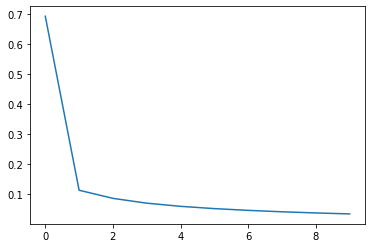

In [71]:
plot(costs)